# NESM Python Workshop Part 3


## Overview

Goals:
We can't cover every use case in detail so the main goals here are:
1. Demonstrate that you can do microscopy analysis completely from python
2. Give a quick tour of the some of the many open source libs (set you up for future success)
3. Go over some domain specific examples
    - reinforce the numpy we learned in part 1
    - Show power of the open source ecosystem
    - Building blocks are all here and numpy is the commmon language of these tools

- Microscopy Image IO


### Scripts vs GUIs

Why one vs the other?

## Image analysis tools

Python has a rich ecosystem of libraries
- [scipy.ndimage](https://docs.scipy.org/doc/scipy/reference/tutorial/ndimage.html)
- [skimage](https://scikit-image.org/docs/dev/api/skimage.html)
- [sklearn](https://scikit-learn.org/stable/)
- [xarray](http://xarray.pydata.org/en/stable/)
- [pandas](https://pandas.pydata.org/)


Domain Specific tools:

- [hyperspy](https://hyperspy.org/hyperspy-doc/current/user_guide/intro.html)
- [microutil](https://github.com/Hekstra-Lab/microutil)
- https://github.com/LeBeauGroup/usetem
**Deep Learning:**
The two world class libraries are both primarily python:
- https://pytorch.org/
- https://www.tensorflow.org/  (we'll see an example later)



## [Napari](https://napari.org/)
    
    
The future of microscopy image visualization. 

- Tools like Matplotlib will always have a place in the workflow, but Napari is a best in class image viewer that also 

GPU accelerated  
Core developers work in bioimaging  
Open source with a strong community of contributors  


- https://www.youtube.com/watch?v=VXdFOcBCto4
- https://jni.github.io/i2k-skimage-napari/lectures/2_segmentation_and_regionprops.html


Let's you work anywhere on the spectrum from pure gui to pure script no interactivity.

## IO

Not always a fully solved problem due to to proprietary formats. 

Libraries exist where people have put in the work to read all the possible types of images. 


Rock solid base: https://github.com/cgohlke/tifffile  
https://github.com/tlambert03/ome-types  
The future (and maybe also the now?): https://allencellmodeling.github.io/aicsimageio/  


Per https://ngff.openmicroscopy.org/latest/ [zarr](https://zarr.readthedocs.io/en/stable/) will be the basis of the next generation file format.

In [ ]:
%matplotlib widget
import xarray as xr
from mpl_interactions import hyperslicer
import matplotlib.pyplot as plt
import mpl_interactions.ipyplot as iplt
import tifffile
import numpy as np

# Looking at an Example SEM image

Kindly provided by JEOL.

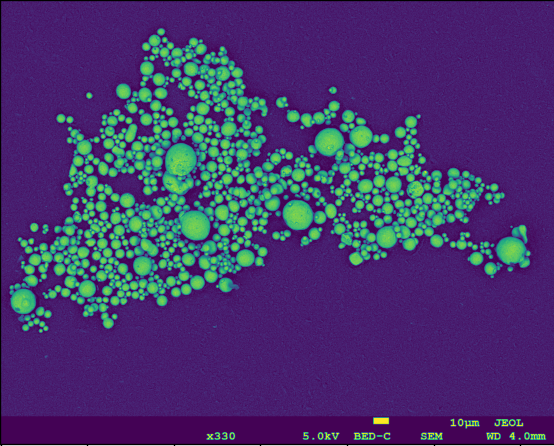

We'd like to be able to reproduce something like this:

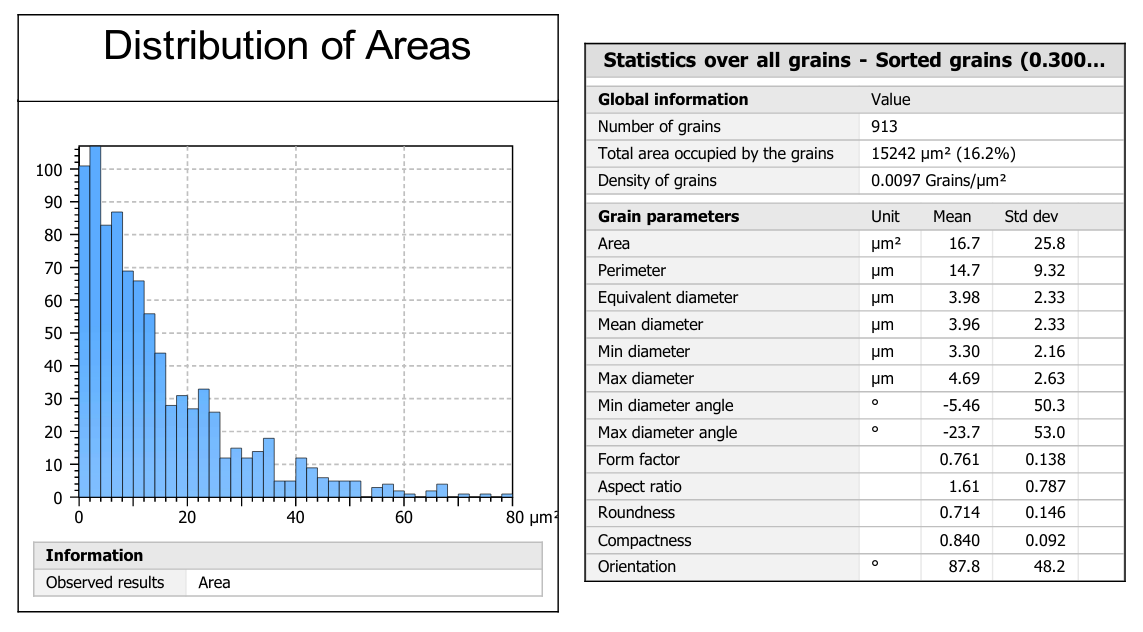


In [ ]:
# load and look at the image


### Extracting Scale Bar

I zoomed in on the image and figured out which pixel are the scale bar then used them

In [ ]:
# Extracting Scale from image and/or metadata in text file

In [ ]:
# pre written code to make an xarray DataArray
particles = particles_raw[:960]
particles = xr.DataArray(
    particles,
    dims=("Y", "X"),
    coords={
        "Y": np.linspace(0, particles.shape[0] * microns_per_pixel, particles.shape[0]),
        "X": np.linspace(0, particles.shape[1] * microns_per_pixel, particles.shape[1])
    },
)

In [ ]:
# image with scales on x and y axis


## Thresholding


### Interactively


Sometimes it's nice to make a human judgement. This is easy to do using existing tools in the python ecosystem.  Here we use code taken nearly verbatim from an example on https://mpl-interactions.readthedocs.io/en/stable/examples/range-sliders.html#Using-a-RangeSlider-for-Scalar-arguments---Thresholding-an-Image


To make it easy to use we've also wrapped it up into a function that we can call easily on an array.

In [ ]:
# interactive threshold determination


## Breakout Exercise

Interactively choosing thresholds does not scale 

1. Make a plot comparing multiple thresholding methods (https://scikit-image.org/docs/dev/auto_examples/segmentation/plot_thresholding.html)
    - Hint: You may need to use `particles.values` as xarray is not always completely interoperable with skimage
2. Segment the particles into individual labels
    - I would google something like: `segment particles skimage`
    - `skimage.measure.label` is appealing but isn't the optimal function.
3. Make a histogram of area of the particles
    - Any of these functions will let you get the areas
         - `np.unique`
         - `ndi.sum_labels`
         - `skimage.measure.regionprops`
    - Make a histogram using `plt.hist`

If you finish all of that experiment with using `skimage.morphology.remove_small_objects` and `skimage.segmentation.relabel_sequential` to clean up any noise we may have let through when thesholding.

## End Breakout

-----

## Making a Table of descriptive Statistics

We will use the `skimage` method `regionprops` by loosely following this tutorial: https://scikit-image.org/docs/stable/auto_examples/segmentation/plot_regionprops.html


In [ ]:
from skimage import measure

In [ ]:
import pandas as pd

df = pd.DataFrame(
    measure.regionprops_table(
        ds['labels'].values,
        properties=[
            "eccentricity",
            "filled_area",
            "equivalent_diameter",
            "orientation",
            "solidity",
            "perimeter",
            "area",
            "local_centroid",
            "minor_axis_length",
            "major_axis_length",
        ],
    )
)
df

In [ ]:
# calculate roundness


## Cell Tracking


Adjacent problem to what we did with the SEM image - we can reuse code!

In [ ]:
# loading the images

import glob
import xarray as xr

files = sorted(glob.glob("data/Fluo-N3DH-CHO/01/*"))
cho_data = tifffile.imread(files)
CHO = xr.DataArray(
    cho_data,
    dims=("T", "Z", "Y", "X"),
    coords={
        "T": 9.5 * np.arange(cho_data.shape[0]),
        "Z": 1.0 * np.arange(cho_data.shape[1]),
        "Y": 0.202 * np.arange(cho_data.shape[2]),
        "X": 0.202 * np.arange(cho_data.shape[3]),
    },
)
sq = CHO.sel(Z=3)

In [ ]:
from mpl_interactions import hyperslicer

plt.figure()
ctrls = hyperslicer(CHO)

## Breakout

### Part 1 - Segmenting a single frame

Using similar code to what you used for segmenting the SEM particle image segment the first frame of the cells image.


Hint: You may find that `ndi.binary_fill_holes` to be useful

You can start this next part but we may come back to the main group depending on how people are doing

### Part 2

Apply this segmenting to all of the time points. 
- It's ok to use a Python for loop here
- Making a function will make your life easier

Bonus: Get fancy and use `xr.apply_ufunc`. This is a bit more advanced but can be very powerful - we use this in our own cell segmenting and tracking pipeline.
http://xarray.pydata.org/en/stable/examples/apply_ufunc_vectorize_1d.html


In [ ]:
images = CHO[:10, 2]
labels = []
peaks = []
blarg = []
thresh = 10
# for t in range(CHO.shape[0]):
for t in range(len(images)):
    a = remove_small_objects(ndi.binary_fill_holes(images[t] > thresh),connectivity=2)
    labels, peak_mask = nu.individualize_single_frame(a)
    blarg.append(labels)
    peaks.append(peak_mask)

labels = np.asarray(blarg)
peaks = np.asarray(peaks)
# labels_layer = correct_watershed(images, labels, peaks)

### End Breakout
----------------

## Tracking

For tracking we will also demonstrate how to add a Human in the loop to correct the errors in our automated processing.

### Breakout exercise

Using the `tracked` array make a plot of cell area over time. 

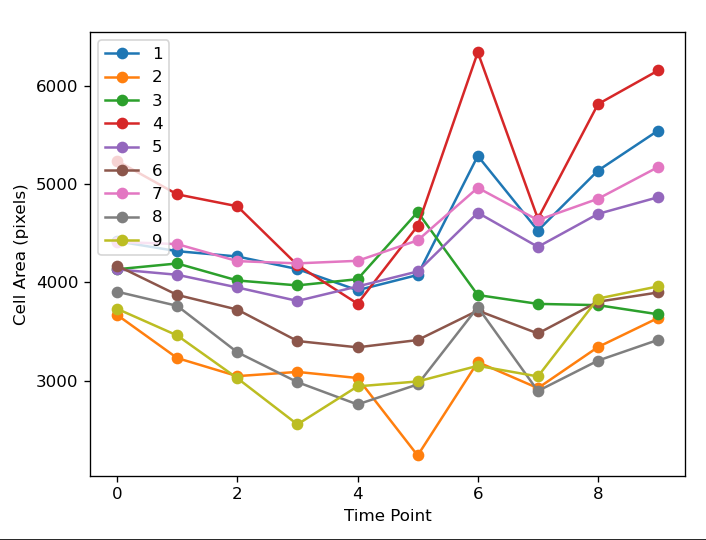





### Extra Breakout Activity


JEOL also kindly provided some EDS data. The below script loads some of the data and plots it. Feel free to play around with the images.

In [ ]:
import glob
fnames = glob.glob('data/EDS-Map/CSV/Map_001 particles_CountMap_*-*.csv')
EDS_map = np.zeros([len(fnames), 192, 256])
peak_names = []
for i, f in enumerate(fnames):
    left_idx = f.rfind('_')+1
    what = f[left_idx:-4]
    EDS_map[i] =  np.genfromtxt(f, delimiter=',')
    peak_names.append(what)


In [ ]:
fig, axs = plt.subplots(3,3)
for i in range(3):
    for j in range(3):
        idx = i*3 + j
        ax = axs[i][j]
        ax.imshow(EDS_map[idx])
        ax.set_title(peak_names[i])
        ax.axis('off')
    


## Closing Thoughts on this section


1. GUI vs Scripting
2. If you make scripts make them available to others!
    - Put up on github with a name
3. If you're at a company - consider open sourcing at least part of your software (see tensorflow)

## How to get help!

Always always always google a phrase that basically says what you want.

Here are some of the things that I googled when making this notebook:

> how to analyze EDS python

> Cell tracking python

> remove small object skimage


In general people are friendly and want to know how you are using their software and what doesn't work for you:

- https://forum.image.sc/
- https://discourse.matplotlib.org/
- https://stackoverflow.com/
- https://discourse.jupyter.org/
- https://gitter.im/hyperspy/hyperspy

Opening issues!
